In [1]:
# # from termcolor import colored
# # print(colored("hello ",'blue', attrs=['bold']))
# from termcolor import colored
# print(colored(" \n HELLO ! <----------  file are saved in .dat format ---------->  ",'blue', attrs=['bold']))

In [2]:
import pandas as pd

# from inflexionMinimadownbump import findDownBump 

excel_path = "C:\\Users\\mrafik\\Desktop\\python_general_code\\xlsfileprocess\\"
ampdf = pd.read_excel(excel_path+'Amplitudexls.xlsx')
phasedf = pd.read_excel(excel_path+'phase.xlsx')
ampdf.head()
print(ampdf.shape)
# x= nm  , y= nA
data_endamp =ampdf.shape[0]
print("end dat pints = \n",data_endamp)

(978, 2)
end dat pints = 
 978


In [3]:
phasedf.head()

,X,Y
0,-0.019733,-33.481091
1,-0.019672,-35.271876
2,-0.019610,-33.091073
3,-0.019549,-33.772230
4,-0.019488,-30.415882


In [4]:
ampdf= ampdf.set_axis(['Piezo','Amplitude'], axis ='columns')
print(ampdf.head())
print("\n ",ampdf.shape)

      Piezo  Amplitude
0 -0.019733   2.308672
1 -0.019672   2.227800
2 -0.019610   2.213686
3 -0.019549   2.206438
4 -0.019488   2.227037

  (978, 2)


In [5]:
phasedf= phasedf.set_axis(['Piezo','Phase'], axis ='columns')
print("\n",phasedf.head(),"\n",phasedf.shape,"\n")

# print(phasedf.iloc[0,1])
# phase  = - phasedf['Phase'] -90 + phasedf.iloc[0,1]
# print("\n", phase.shape)
# print("\n new phase values: \n", phase[0:5])




       Piezo      Phase
0 -0.019733 -33.481091
1 -0.019672 -35.271876
2 -0.019610 -33.091073
3 -0.019549 -33.772230
4 -0.019488 -30.415882 
 (978, 2) 



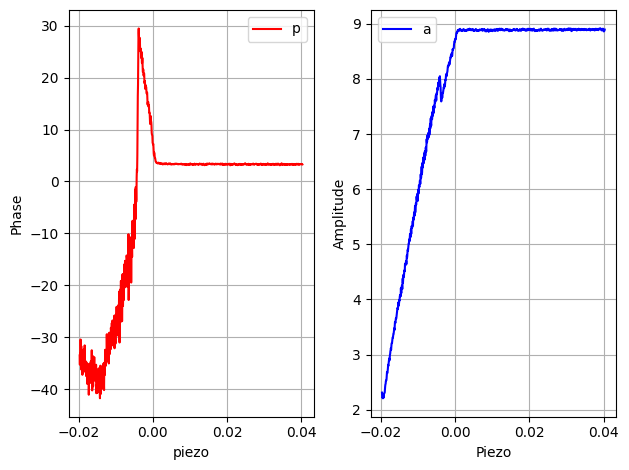

In [6]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(phasedf['Piezo'],phasedf['Phase'],'-r')
plt.legend('phase')
plt.xlabel('piezo')
plt.ylabel('Phase')
plt.grid() 
plt.subplot(1,2,2)
plt.plot(ampdf['Piezo'],ampdf['Amplitude'],'-b')
plt.legend('amplitude')
plt.xlabel('Piezo')
plt.ylabel('Amplitude')
plt.grid() 
plt.tight_layout()
plt.show()

In [7]:
# import numpy as np
# zero_indices = df.loc[df['Column1'] == 0].index

# Print the indices
# print("Indices where 'Column1' has zero values:", zero_indices)
indices_zero = ampdf.loc[ampdf['Piezo'] >= 0].index
zero_orFlatAmp = indices_zero[0]   # zero_orFlatAmp --> this will be used in future 
print(zero_orFlatAmp )
print(ampdf.iloc[322,0])


322
4.1487230170491056e-05


 the shape and size of the amplitude array before the np.diff: (4:dataendpoint) 
 (318,)
x values
 and shape of x  4   -0.019488
5   -0.019426
6   -0.019365
7   -0.019303
8   -0.019242
Name: Piezo, dtype: float64 (318,)
I am indsid ethe array: function arary 
: [-0.00038147 -0.01907363  0.02899192 -0.00610356  0.06523182  0.00228884
  0.00305178  0.00991829  0.06446888  0.04653966]
longest sequence =
 [250 251 252 253 254 255]
x axis=
 [-0.00413453 -0.00407312 -0.00401171 -0.00395029 -0.00388888 -0.00382747]
scat val x: 	 
 250
scat val y: 	 
 -0.07934630912000085


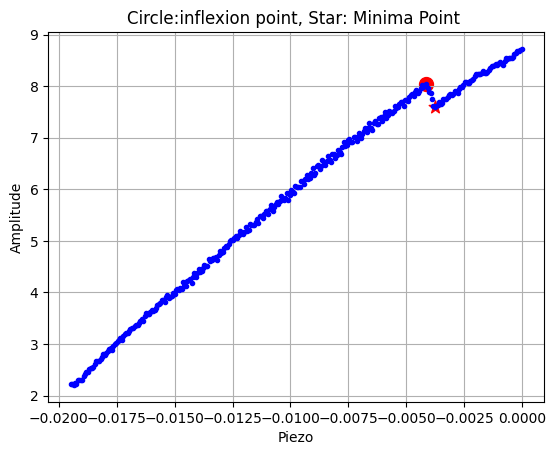


 Actual inflexion point Index with original data :   254  
 Actual Minima point Index before Slicing with original Data :  260 
 inflexion point index after slicing:  250 
 Minima point Index After slicing:  256
index_inflexion 254
index_minima 260


In [8]:
# ampdf
# zero_orFlatAmp

from inflexionMinimadownbump import findDownBump 
res_indices = findDownBump(ampdf,zero_orFlatAmp)
index_inflexion = res_indices[0]
print("index_inflexion",index_inflexion)
index_minima = res_indices[1]
print("index_minima",index_minima)


In [9]:
# index_inflexion = res_indices[0]
# print("index_inflexion",index_inflexion)
# index_minima = res_indices[1]
# print("index_minima",index_minima)

d in nm 	: 0.06141201834528043
6.141201834528043e-05
6.141201834528043e-05
6.141201834528043e-05
6.14120183452839e-05
6.141201834528043e-05
n count back =  82.0

 index starting wrto inflexion :  172.0 
 index starting wrto Minima :  178.0
m (slope in nA/nm ): 0.34555049482438593
c, zero intercept nA (intercept): 9.469381260281175


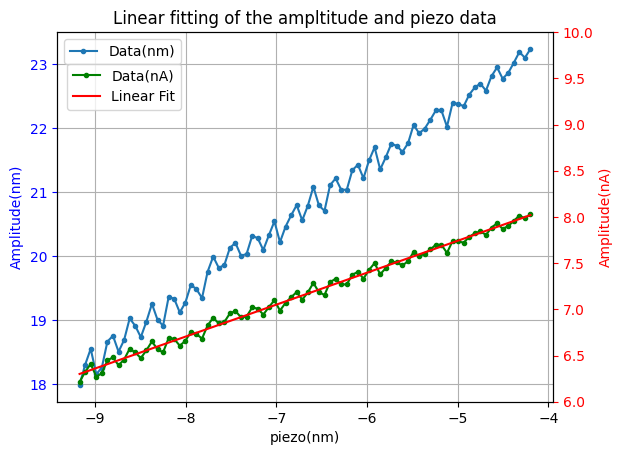

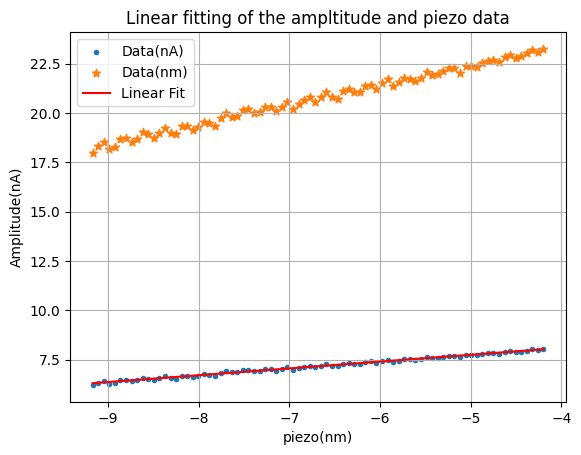

172   -9.170316
173   -9.108904
174   -9.047491
175   -8.986079
176   -8.924667
Name: Piezo, dtype: float64


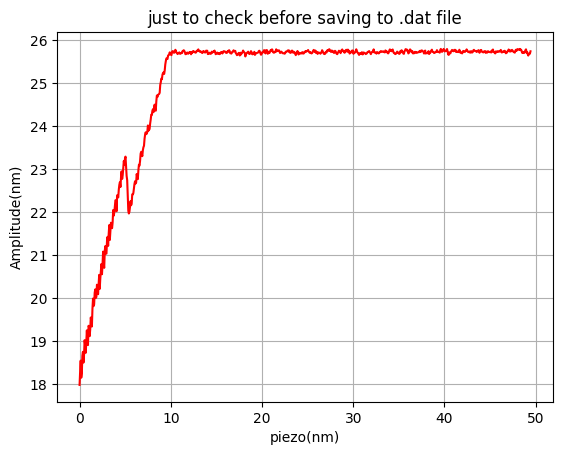

-33.48109057

 (978,)

 new phase values: 
 0   -53.244959
1   -51.454173
2   -53.634976
3   -52.953819
4   -56.310168
Name: Phase, dtype: float64


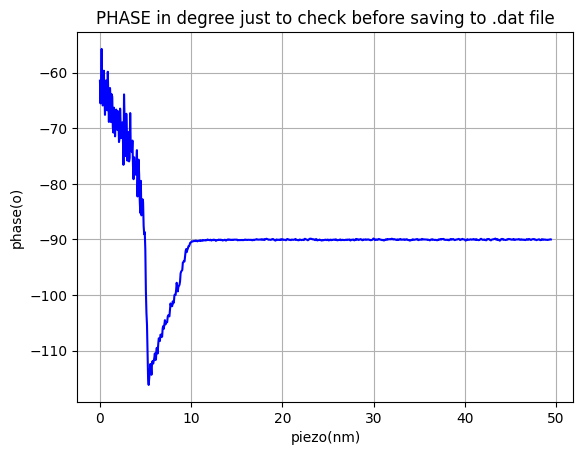


 (806,) 
 (806,) 
 (806,)
 
 HELLO ! <----------  file are saved in .dat format ---------->  


In [12]:
import numpy as np 
xpiezo_nm = 1000*ampdf['Piezo']  # now xpiezo_nm in nm -->  after multiplying by 1000 become in nm 

x_diff = np.diff(ampdf['Piezo'])

d_nm = 1000*x_diff[5]   # this is in nanometer now. 

print("d in nm \t:",d_nm)

count = 0
for val in x_diff:
    # just to check common differences between piezo values.
    count = count+1
    print(val)
    if count ==5:
        break
        
# plt.plot(list(range(len(x_diff))), ampdf['Piezo'])    
# plt.show()
# #     print()

# here 2.5,3nm any value we put get corresponding N 

N_count_back = (5.0)/(d_nm)  # (using a+(n-1)D)

N_count_back = np.ceil(N_count_back)
print("n count back = ",N_count_back)

desired_nmBackIndexwrtoInflexion = res_indices[0] - N_count_back  # it is from the inflexion point

desired_nmBackIndexwrtoMinima = res_indices[1] - N_count_back  # this is from the minima point
# desired_nmBackIndex

# now time to choose the data 3nm after the minima(bump):
N_count_forward = (10.0)/(d_nm)  # (using a+(n-1)D)
N_count_forward = np.ceil(N_count_forward)
data_choose_endindex = res_indices[1] + int(N_count_forward)
data_choose_endindex=data_endamp

print("\n index starting wrto inflexion : ",desired_nmBackIndexwrtoInflexion, 
     "\n index starting wrto Minima : ",desired_nmBackIndexwrtoMinima)

desired_nmBackIndexwrtoInflexion = int(desired_nmBackIndexwrtoInflexion)
desired_nmBackIndexwrtoMinima = int(desired_nmBackIndexwrtoMinima)



##### ----------this is for linear fitting the data from desired point to the inflexion points data :-----------##
# Perform linear regression for linear fitting

ampdf_x_nm = 1000*ampdf['Piezo'][desired_nmBackIndexwrtoInflexion:index_inflexion]
ampdf_y_nA = ampdf['Amplitude'][desired_nmBackIndexwrtoInflexion:index_inflexion]

coefficients = np.polyfit(ampdf_x_nm,ampdf_y_nA, 1)

m, c = coefficients
# Print the results
print(f"m (slope in nA/nm ): {m}")
print(f"c, zero intercept nA (intercept): {c}")

ampdf_y_nm = (1/m)*ampdf_y_nA    #--------****** save this data as Amplitude in .dat file----------*********** 

poly = np.poly1d(coefficients)  # this is like f(x) = m*x + c , give x values get y values.

# Plot the data and the linear fit
fig, ax1 = plt.subplots()
ax1.plot(ampdf_x_nm,ampdf_y_nm, marker ='.',label='Data(nm)')
ax1.set_xlabel('piezo(nm)')
ax1.set_ylabel('Amplitude(nm)',color='b')
ax1.tick_params('y', colors='b')  # this will make blue color font on y axis left side.
ax1.grid()
ax1.legend()

ax2= ax1.twinx()  # it will share the x axis --> twinx()
ax2.plot(ampdf_x_nm, ampdf_y_nA, color='green',marker ='.',label='Data(nA)')
ax2.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit') 
ax2.set_xlabel('piezo(nm)')
ax2.set_ylabel('Amplitude(nA)',color='r')
ax2.tick_params('y',colors = 'r')
ax2.set_ylim([6,10])
# ax2.set_grid()
ax2.legend(loc=[0.02,0.79])
plt.title('Linear fitting of the ampltitude and piezo data')
plt.show()




# ************ ------------ this is working fine for me ----------------------******************
# same data but another figure 
fig
plt.scatter(ampdf_x_nm, ampdf_y_nA, marker ='.',label='Data(nA)')

plt.scatter(ampdf_x_nm,ampdf_y_nm, marker ='*',label='Data(nm)') # THIS IS FOR CONVERTED Y DATA TO nm --> y=  y*(1/m)

plt.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit')

plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('Amplitude(nA)')
plt.title('Linear fitting of the ampltitude and piezo data')
plt.legend()
plt.show()


# ----------------******************************* this is the final data we will save in .dat file .------------------
ampdata2saveAspiezo_nm = xpiezo_nm[desired_nmBackIndexwrtoInflexion:data_choose_endindex]
print(ampdata2saveAspiezo_nm.head())
# ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm + c/m
ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm - ampdata2saveAspiezo_nm[desired_nmBackIndexwrtoInflexion] 

ampdata2saveAsAmplitude_nm = (1/m)* ampdf['Amplitude'][desired_nmBackIndexwrtoInflexion:data_choose_endindex]

ampdata2saveAsAmplitude_nm.shape
plt.plot(ampdata2saveAspiezo_nm,ampdata2saveAsAmplitude_nm,'-r')
plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('Amplitude(nm)')
plt.title('just to check before saving to .dat file')
# plt.legend()
plt.show()


# #  this is for the phase values:---------------------------------********


print(phasedf.iloc[0,1]) # first value added -- phasedf.iloc[0,1]
# last value add ---- > phasedf.iloc[data_endamp-1,1] 

phase  = - phasedf['Phase'] -90 + phasedf.iloc[data_endamp-1,1]
print("\n", phase.shape)
print("\n new phase values: \n", phase[0:5])

phasedata2savedegree = phase[desired_nmBackIndexwrtoInflexion:data_choose_endindex]

plt.plot(ampdata2saveAspiezo_nm,phasedata2savedegree,'-b')
plt.grid()
plt.xlabel('piezo(nm)')
plt.ylabel('phase(o)')
plt.title('PHASE in degree just to check before saving to .dat file')
# plt.legend()
plt.show()


# # now generate a .dat file from the where data is saved ( unit: nm)

import pandas as pd
df1 = ampdata2saveAspiezo_nm
df1 = df1*1E-9
df2 = ampdata2saveAsAmplitude_nm*1E-9
df3 = phasedata2savedegree*10E-1
print("\n",df1.shape,"\n",df2.shape, "\n",df3.shape)
# Concatenate the DataFrames vertically
combined_df = pd.concat([df1,df2,df3], axis=1)
# Save the combined DataFrame to a .dat file
from termcolor import colored
print(colored(" \n HELLO ! <----------  file are saved in .dat format ---------->  ",'green', attrs=['bold']))

combined_df.to_csv(excel_path+'finalcombined_data.dat', sep=' ', index=False, header=False)



# # Save the combined DataFrame to a .dat file
# combined_df.to_csv('combined_data.dat', sep=' ', index=False)


In [11]:
# ##-------------*********************-this is another methode without triming from the left.*************

# import numpy as np 
# xpiezo_nm = 1000*ampdf['Piezo']  # now xpiezo_nm in nm -->  after multiplying by 1000 become in nm 

# x_diff = np.diff(ampdf['Piezo'])
# d_nm = 1000*x_diff[8]   # this is in nanometer now. common difference.
# print("d in nm \t:",d_nm)

# # count = 0
# # for val in x_diff:
# #     # just to check common differences between piezo values.
# #     count = count+1
# #     print(val)
# #     if count ==5:
# #         break
        
# # plt.plot(list(range(len(x_diff))), ampdf['Piezo'])    
# # plt.show()
# # #     print()

# # here 2.5,3nm any value we put get corresponding N 

# # N_count_back = (4.0)/(d_nm)  #(using a+(n-1)D)

# # N_count_back = np.ceil(N_count_back)
# # print("n count back = ",N_count_back)

# # desired_nmBackIndexwrtoInflexion = res_indices[0] - N_count_back  # it is from the inflexion point

# # desired_nmBackIndexwrtoMinima = res_indices[1] - N_count_back  # this is from the minima point
# # # desired_nmBackIndex

# # now time to choose the data 3nm after the minima(bump):
# N_count_forward = (10.0)/(d_nm)  # (using a+(n-1)D)
# N_count_forward = np.ceil(N_count_forward)
# data_choose_endindex = res_indices[1] + int(N_count_forward)


# # print("\n index starting wrto inflexion : ",desired_nmBackIndexwrtoInflexion, 
# #      "\n index starting wrto Minima : ",desired_nmBackIndexwrtoMinima)

# # desired_nmBackIndexwrtoInflexion = int(desired_nmBackIndexwrtoInflexion)
# # desired_nmBackIndexwrtoMinima = int(desired_nmBackIndexwrtoMinima)



# ##### ----------this is for linear fitting the data from desired point to the inflexion points data :-----------##
# # Perform linear regression for linear fitting
# start_slice = 5
# ampdf_x_nm = 1000*ampdf['Piezo'][start_slice:index_inflexion]
# ampdf_y_nA = ampdf['Amplitude'][start_slice:index_inflexion]

# coefficients = np.polyfit(ampdf_x_nm,ampdf_y_nA, 1)

# m, c = coefficients
# # Print the results
# print(f"m (slope in nA/nm ): {m}")
# print(f"c, zero intercept nA (intercept): {c}")

# ampdf_y_nm = (1/m)*ampdf_y_nA    #--------****** save this data as Amplitude in .dat file----------*********** 

# poly = np.poly1d(coefficients)  # this is like f(x) = m*x + c , give x values get y values.

# # Plot the data and the linear fit
# fig, ax1 = plt.subplots()
# ax1.plot(ampdf_x_nm,ampdf_y_nm, marker ='.',label='Data(nm)')
# ax1.set_xlabel('piezo(nm)')
# ax1.set_ylabel('Amplitude(nm)',color='b')
# ax1.tick_params('y', colors='b')  # this will make blue color font on y axis left side.
# ax1.grid()
# ax1.legend()

# ax2= ax1.twinx()  # it will share the x axis --> twinx()
# ax2.plot(ampdf_x_nm, ampdf_y_nA, color='green',marker ='.',label='Data(nA)')
# ax2.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit') 
# ax2.set_xlabel('piezo(nm)')
# ax2.set_ylabel('Amplitude(nA)',color='r')
# ax2.tick_params('y',colors = 'r')
# ax2.set_ylim([6,10])
# # ax2.set_grid()
# ax2.legend(loc=[0.02,0.79])
# plt.title('Linear fitting of the ampltitude and piezo data')
# plt.show()




# # ************ ------------ this is working fine for me ----------------------******************
# # same data but another figure 
# fig
# plt.scatter(ampdf_x_nm, ampdf_y_nA, marker ='.',label='Data(nA)')

# plt.scatter(ampdf_x_nm,ampdf_y_nm, marker ='*',label='Data(nm)') # THIS IS FOR CONVERTED Y DATA TO nm --> y=  y*(1/m)

# plt.plot(ampdf_x_nm, poly(ampdf_x_nm), color='red', label='Linear Fit')

# plt.grid()
# plt.xlabel('piezo(nm)')
# plt.ylabel('Amplitude(nA)')
# plt.title('Linear fitting of the ampltitude and piezo data')
# plt.legend()
# plt.show()


# # ************************** this is the finsl data we will save in .dat file .------------------
# ampdata2saveAspiezo_nm = xpiezo_nm[start_slice:data_choose_endindex]
# # ampdata2saveAspiezo_nm.shape
# # print(ampdata2saveAspiezo_nm.head())
# # ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm + c/m
# ampdata2saveAspiezo_nm = ampdata2saveAspiezo_nm - ampdata2saveAspiezo_nm[start_slice]
# # print(ampdata2saveAspiezo_nm.head())
# ampdata2saveAsAmplitude_nm = (1/m)* ampdf['Amplitude'][start_slice:data_choose_endindex]
# print(" size of the data \n",ampdata2saveAsAmplitude_nm.shape)



# plt.plot(ampdata2saveAspiezo_nm,ampdata2saveAsAmplitude_nm,'-r')
# plt.grid()
# plt.xlabel('piezo(nm)')
# plt.ylabel('Amplitude(nm)')
# plt.title('just to check before saving to .dat file')
# # plt.legend()
# plt.show()


# #  this is for the phase values:---------------------------------********


# print(phasedf.iloc[0,1])
# phase  = - phasedf['Phase'] -90 + phasedf.iloc[0,1]
# print("\n", phase.shape)
# print("\n new phase values: \n", phase[0:5])

# phasedata2savedegree = phase[start_slice:data_choose_endindex]

# plt.plot(ampdata2saveAspiezo_nm,phasedata2savedegree,'-b')
# plt.grid()
# plt.xlabel('piezo(nm)')
# plt.ylabel('phase(o)')
# plt.title('PHASE in degree just to check before saving to .dat file')
# # plt.legend()
# plt.show()


# # now generate a .dat file from the where data is saved ( unit: nm)

# import pandas as pd
# df1 = ampdata2saveAspiezo_nm
# df2 = ampdata2saveAsAmplitude_nm
# df3 = phasedata2savedegree
# print("\n",df1.shape,"\n",df2.shape, "\n",df3.shape)
# # Concatenate the DataFrames vertically
# combined_df = pd.concat([df1,df2,df3], axis=1)
# # Save the combined DataFrame to a .dat file
# combined_df.to_csv(excel_path+'finalcombined_data.dat', sep=' ', index=False, header=False)



# # # Save the combined DataFrame to a .dat file
# # combined_df.to_csv('combined_data.dat', sep=' ', index=False)


# after this line delete all the line  below!!!!!!!! 